# ML CASE STUDY

In [552]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:.1f}'.format
import warnings
warnings.filterwarnings('ignore')

In [553]:
# Importing all datasets
df = pd.read_csv("Leads.csv")
df.head()



,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [554]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [555]:
df.shape

(9240, 37)

In [556]:
(df.isnull().sum(axis=0)/len(df))*100


Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.4
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      1.5
Total Time Spent on Website                      0.0
Page Views Per Visit                             1.5
Last Activity                                    1.1
Country                                         26.6
Specialization                                  15.6
How did you hear about X Education              23.9
What is your current occupation                 29.1
What matters most to you in choosing a course   29.3
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

#### -> Most of variables has high number of categorical values so i'm reducting them by clubbing values with less variance together and name this variable 'other'. This action will perform on different columns separately.

## Imputation and deletion of columns

In [557]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
NC_EDM                  1
youtubechannel          1
testone                 1
welearnblog_Home        1
WeLearn                 1
Pay per Click Ads       1
blog                    1
Name: Lead Source, dtype: int64

In [558]:
#Value reduction in 'Lead Source'
series = pd.value_counts(df['Lead Source'])
mask = (series/series.sum() * 100).lt(2)
# To replace df['column'] use np.where I.e 
df['Lead Source'] = np.where(df['Lead Source'].isin(series[mask].index),'Other',df['Lead Source'])
df['Lead Source'].value_counts()

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other              350
Name: Lead Source, dtype: int64

In [559]:
# Value reduction in 'Last Activity'

df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [560]:
# Value reduction in 'Last Activity'.Combining categorical values of 'Last Activity' that has low variance in one column'other' 

series = pd.value_counts(df['Last Activity'])
mask = (series/series.sum() * 100).lt(2)
# To replace df['column'] use np.where I.e 
df['Last Activity'] = np.where(df['Last Activity'].isin(series[mask].index),'Other',df['Last Activity'])

In [561]:
df['Last Activity'].value_counts()

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Email Bounced               326
Other                       321
Email Link Clicked          267
Name: Last Activity, dtype: int64

In [562]:
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Canada                     4
South Africa               4
Nigeria                    4
Germany                    4
Sweden                     3
Bangladesh                 2
Uganda                     2
Asia/Pacific Region        2
Ghana                      2
Italy                      2
Belgium                    2
Netherlands                2
Philippines                2
China                      2
Denmark                    1
Kenya                      1
Switzerland                1
Malaysia                   1
Sri Lanka                  1
Liberia                    1
Russia        

-> 'Country' variable has 'India' in almost all places and if i delete this, it will not impact the model so i'm deleting 'Country'column.

In [563]:
# Dropping 'Country' column
df['Country'].value_counts()
df.drop('Country',axis=1,inplace = True)

In [564]:
df.shape

(9240, 36)

In [565]:
df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [566]:
# 'Specialization': Value reduction and renaming of 'Select' into not sure.

df['Specialization'] = df['Specialization'].replace('Select', 'Not sure')
series = pd.value_counts(df['Specialization'])
mask = (series/series.sum() * 100).lt(2)
# To replace df['column'] use np.where I.e 
df['Specialization'] = np.where(df['Specialization'].isin(series[mask].index),'Other',df['Specialization'])
df['Specialization'].value_counts()



Not sure                             1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Other                                 496
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Name: Specialization, dtype: int64

#### 'Specialization' variable has no normal distribution so i'm imputing missing values randomly in place of taking mode

In [567]:
#Randomly filling 'Specialization' null values

p = df['Specialization'].value_counts(normalize=True)
m = df['Specialization'].isnull()


np.random.seed(42)
rand_fill = np.random.choice(p.index, size=m.sum(), p=p)
#array(['Joe', 'Mark'], dtype=object)

df.loc[m, 'Specialization'] = rand_fill

df['Specialization'].value_counts()

Not sure                             2327
Finance Management                   1144
Marketing Management                  987
Human Resource Management             983
Operations Management                 610
Other                                 583
Business Administration               469
IT Projects Management                436
Banking, Investment And Insurance     417
Supply Chain Management               399
Media and Advertising                 247
Travel and Tourism                    238
International Business                210
Healthcare Management                 190
Name: Specialization, dtype: int64

In [568]:
# Values of 'How did you hear about X Education'

df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

#### People who filled this form must have forgotten to fill this column because technically it has all options including 'others'.

In [569]:
#Replacing 'Select' with null values.

df.replace('Select',np.nan,inplace=True)
df['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [570]:
#Randomly filling 'How did you hear about X Education's null values

p = df['How did you hear about X Education'].value_counts(normalize=True)
m = df['How did you hear about X Education'].isnull()


np.random.seed(42)
rand_fill = np.random.choice(p.index, size=m.sum(), p=p)


df.loc[m, 'How did you hear about X Education'] = rand_fill

df['How did you hear about X Education'].value_counts()

Online Search            3782
Word Of Mouth            1615
Student of SomeSchool    1426
Other                     873
Multiple Sources          675
Social Media              329
Advertisements            325
Email                     121
SMS                        94
Name: How did you hear about X Education, dtype: int64

In [571]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [572]:
# Filling null with 'Unemployed' in 'What is your current occupation'

df['What is your current occupation'].fillna('Unemployed',inplace=True)

#### I replace null with 'unemployed' because there is 'other' option present in dropdown but customer leave it for reason that's why i impute null with 'unemployed' in 'What is your current occupation'. Also, the distribution is 'normal' so i used  mode of this variable.

In [573]:
# Variable reduction in 'What is your current occupation'

series = pd.value_counts(df['What is your current occupation'])
mask = (series/series.sum() * 100).lt(1)
# To replace df['column'] use np.where I.e 
df['What is your current occupation'] = np.where(df['What is your current occupation'].isin(series[mask].index),'Other',df['What is your current occupation'])
df['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     34
Name: What is your current occupation, dtype: int64

In [574]:
# Checkin value of 'What matters most to you in choosing a course'

df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [575]:
# Dropping 'What matters most to you in choosing a course' column

df.drop('What matters most to you in choosing a course',axis=1, inplace=True)

#### I droped  ''What matters most to you in choosing a course'' because all values are alsmost same so there will be no impact on model if i delete this column.

In [576]:
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [577]:
#Reducing categorical values from 'Tag' column

series = pd.value_counts(df['Tags'])
mask = (series/series.sum() * 100).lt(2)
# To replace df['column'] use np.where I.e 
df['Tags'] = np.where(df['Tags'].isin(series[mask].index),'Other',df['Tags'])
df['Tags'].value_counts()

Will revert after reading the email    2072
Ringing                                1203
Other                                   530
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Name: Tags, dtype: int64

In [578]:
#Random filling of null in 'Tags' column

p = df['Tags'].value_counts(normalize=True)
m = df['Tags'].isnull()


np.random.seed(42)
rand_fill = np.random.choice(p.index, size=m.sum(), p=p)


df.loc[m, 'Tags'] = rand_fill

df['Tags'].value_counts()

Will revert after reading the email    3257
Ringing                                1876
Other                                   838
Interested in other courses             818
Already a student                       729
Closed by Horizzon                      557
switched off                            377
Lost to EINS                            287
Busy                                    278
Not doing further education             223
Name: Tags, dtype: int64

In [579]:
df['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [580]:
# Random imputation of null values in 'Lead Quality' 

p = df['Lead Quality'].value_counts(normalize=True)  # Series of probabilities
m = df['Lead Quality'].isnull()


np.random.seed(42)
rand_fill = np.random.choice(p.index, size=m.sum(), p=p)
#array(['Joe', 'Mark'], dtype=object)

df.loc[m, 'Lead Quality'] = rand_fill
#df['Specialization'] = df['Specialization'].replace('Select', 'Others')
df['Lead Quality'].value_counts()
#df['Specialization'].mode()

Might be             3230
Not Sure             2233
High in Relevance    1355
Worst                1230
Low in Relevance     1192
Name: Lead Quality, dtype: int64

In [581]:
df['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [582]:
# Random imputation of null values in 'Lead Profile'

p = df['Lead Profile'].value_counts(normalize=True)
m = df['Lead Profile'].isnull()


np.random.seed(42)
rand_fill = np.random.choice(p.index, size=m.sum(), p=p)


df.loc[m, 'Lead Profile'] = rand_fill

df['Lead Profile'].value_counts()

Potential Lead                 6285
Other Leads                    1870
Student of SomeSchool           924
Lateral Student                  88
Dual Specialization Student      73
Name: Lead Profile, dtype: int64

In [583]:
df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [584]:
# Droping 'City' column

df.drop('City',axis=1, inplace=True)

In [585]:
df['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [586]:
#'Asymmetrique Activity Index' imputing null values with random variables

p = df['Asymmetrique Activity Index'].value_counts(normalize=True)
m = df['Asymmetrique Activity Index'].isnull()


np.random.seed(42)
rand_fill = np.random.choice(p.index, size=m.sum(), p=p)


df.loc[m, 'Asymmetrique Activity Index'] = rand_fill

df['Asymmetrique Activity Index'].value_counts()

02.Medium    7076
01.High      1495
03.Low        669
Name: Asymmetrique Activity Index, dtype: int64

In [587]:
df['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [588]:
#'Asymmetrique Profile Index' imputing null values with random variables

p = df['Asymmetrique Profile Index'].value_counts(normalize=True)
m = df['Asymmetrique Profile Index'].isnull()


np.random.seed(42)
rand_fill = np.random.choice(p.index, size=m.sum(), p=p)


df.loc[m, 'Asymmetrique Profile Index'] = rand_fill

df['Asymmetrique Profile Index'].value_counts()

02.Medium    5118
01.High      4066
03.Low         56
Name: Asymmetrique Profile Index, dtype: int64

In [589]:
df['Asymmetrique Activity Score'].value_counts()

14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [590]:
#'Asymmetrique Activity Score' imputing null values with random variables

p = df['Asymmetrique Activity Score'].value_counts(normalize=True)
m = df['Asymmetrique Activity Score'].isnull()


np.random.seed(42)
rand_fill = np.random.choice(p.index, size=m.sum(), p=p)


df.loc[m, 'Asymmetrique Activity Score'] = rand_fill

df['Asymmetrique Activity Score'].value_counts()

14.0    3276
15.0    2349
13.0    1451
16.0     857
17.0     627
12.0     365
11.0     179
10.0     101
9.0       20
18.0       7
8.0        7
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [591]:
df['Asymmetrique Profile Score'].value_counts()

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

In [592]:
#'Asymmetrique Profile Score' imputing null values with random variables

p = df['Asymmetrique Profile Score'].value_counts(normalize=True)
m = df['Asymmetrique Profile Score'].isnull()


np.random.seed(42)
rand_fill = np.random.choice(p.index, size=m.sum(), p=p)


df.loc[m, 'Asymmetrique Profile Score'] = rand_fill

df['Asymmetrique Profile Score'].value_counts()

15.0    3255
18.0    1937
16.0    1138
17.0    1046
20.0     574
19.0     459
14.0     397
13.0     378
12.0      42
11.0      14
Name: Asymmetrique Profile Score, dtype: int64

In [593]:
df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
View in browser link Clicked       1
Email Received                     1
Approached upfront                 1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

In [594]:
# Variable reduction and imputing null values with random variables in 'Last Notable Activity'

series = pd.value_counts(df['Last Notable Activity'])
mask = (series/series.sum() * 100).lt(1)
# To replace df['column'] use np.where I.e 
df['Last Notable Activity'] = np.where(df['Last Notable Activity'].isin(series[mask].index),'Other',df['Last Notable Activity'])

In [595]:
df['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other                       160
Name: Last Notable Activity, dtype: int64

In [596]:
# droping rows that have null values

df = df.dropna(how='any',axis=0)

In [597]:
(df.isnull().sum(axis=0)/len(df))*100

Prospect ID                                0.0
Lead Number                                0.0
Lead Origin                                0.0
Lead Source                                0.0
Do Not Email                               0.0
Do Not Call                                0.0
Converted                                  0.0
TotalVisits                                0.0
Total Time Spent on Website                0.0
Page Views Per Visit                       0.0
Last Activity                              0.0
Specialization                             0.0
How did you hear about X Education         0.0
What is your current occupation            0.0
Search                                     0.0
Magazine                                   0.0
Newspaper Article                          0.0
X Education Forums                         0.0
Newspaper                                  0.0
Digital Advertisement                      0.0
Through Recommendations                    0.0
Receive More 

In [598]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 34 columns):
Prospect ID                                 9074 non-null object
Lead Number                                 9074 non-null int64
Lead Origin                                 9074 non-null object
Lead Source                                 9074 non-null object
Do Not Email                                9074 non-null object
Do Not Call                                 9074 non-null object
Converted                                   9074 non-null int64
TotalVisits                                 9074 non-null float64
Total Time Spent on Website                 9074 non-null int64
Page Views Per Visit                        9074 non-null float64
Last Activity                               9074 non-null object
Specialization                              9074 non-null object
How did you hear about X Education          9074 non-null object
What is your current occupation             9074 

In [599]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not sure,Online Search,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Potential Lead,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not sure,Social Media,Unemployed,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Student of SomeSchool,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student of SomeSchool,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Other,Media and Advertising,Word Of Mouth,Unemployed,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Other Leads,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not sure,Other,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,02.Medium,01.High,15.0,18.0,No,No,Modified


In [600]:
#Converting columns that has 'yes/no' values into '0/1'

varlist =  ['Do Not Email', 'Do Not Call','Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

## Dummy Variables

In [601]:
# Creating a dummy variable for some of the categorical variables.
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source','Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation','Tags', 'Lead Quality','Lead Profile', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [602]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not sure,Specialization_Operations Management,Specialization_Other,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Not sure,Online Search,Unemployed,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,No,No,Potential Lead,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Not sure,Social Media,Unemployed,0,0,0,0,0,0,0,0,Ringing,Not Sure,No,No,Student of SomeSchool,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student of SomeSchool,Student,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,No,No,Potential Lead,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Other,Media and Advertising,Word Of Mouth,Unemployed,0,0,0,0,0,0,0,0,Ringing,Not Sure,No,No,Other Leads,02.Medium,01.Hi

In [603]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 

In [604]:
# We have created dummies for the below variables, so we can drop them
df =df.drop(['Prospect ID', 'Lead Number','Lead Origin', 'Lead Source','Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation','Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content','Lead Profile', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index','I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity',], 1)

In [605]:
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not sure,Specialization_Operations Management,Specialization_Other,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,15.0,15.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,15.0,15.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,14.0,20.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,13.0,17.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,15.0,18.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0


In [606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 76 columns):
Do Not Email                                                9074 non-null int64
Do Not Call                                                 9074 non-null int64
Converted                                                   9074 non-null int64
TotalVisits                                                 9074 non-null float64
Total Time Spent on Website                                 9074 non-null int64
Page Views Per Visit                                        9074 non-null float64
Search                                                      9074 non-null int64
Magazine                                                    9074 non-null int64
Newspaper Article                                           9074 non-null int64
X Education Forums                                          9074 non-null int64
Newspaper                                                   9074 non-null int64
Digital A

In [607]:
df.shape

(9074, 76)

## Outlier Detection

{'whiskers': [<matplotlib.lines.Line2D at 0x23d825e3320>,
 'caps': [<matplotlib.lines.Line2D at 0x23d825e3630>,
 'boxes': [<matplotlib.lines.Line2D at 0x23d825e32e8>],
 'medians': [<matplotlib.lines.Line2D at 0x23d81a547f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23d81450630>],
 'means': []}

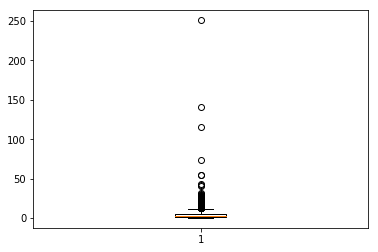

In [608]:
plt.boxplot(df['TotalVisits'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23d81e0ca58>,
 'caps': [<matplotlib.lines.Line2D at 0x23d821c3cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23d81e0cc18>],
 'medians': [<matplotlib.lines.Line2D at 0x23d821c35c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23d81398518>],
 'means': []}

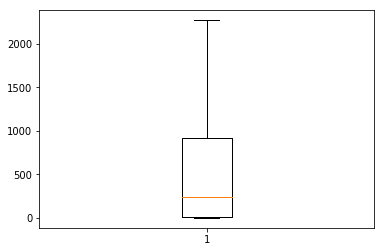

In [609]:
plt.boxplot(df['Total Time Spent on Website'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23d82719ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x23d82719470>,
 'boxes': [<matplotlib.lines.Line2D at 0x23d82719048>],
 'medians': [<matplotlib.lines.Line2D at 0x23d826fc588>],
 'fliers': [<matplotlib.lines.Line2D at 0x23d826fc668>],
 'means': []}

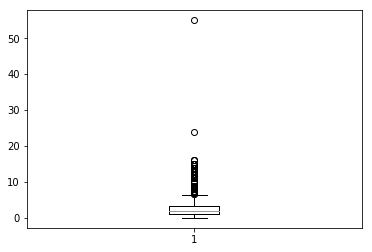

In [610]:
plt.boxplot(df['Page Views Per Visit'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23d81f1f5f8>,
 'caps': [<matplotlib.lines.Line2D at 0x23d81f1fc88>,
 'boxes': [<matplotlib.lines.Line2D at 0x23d81f1f208>],
 'medians': [<matplotlib.lines.Line2D at 0x23d81f1ff98>],
 'fliers': [<matplotlib.lines.Line2D at 0x23d81f286a0>],
 'means': []}

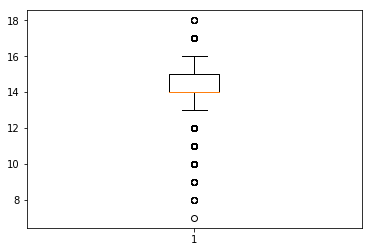

In [611]:
plt.boxplot(df['Asymmetrique Activity Score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23d822e8e10>,
 'caps': [<matplotlib.lines.Line2D at 0x23d822f64e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23d822e8a20>],
 'medians': [<matplotlib.lines.Line2D at 0x23d822f6b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x23d822f6eb8>],
 'means': []}

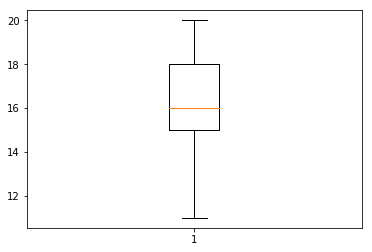

In [612]:
plt.boxplot(df['Asymmetrique Profile Score'])

In [613]:
# Outlier removal from column' Total viists'

Q1 = df['TotalVisits'].quantile(0.05)
Q3 = df['TotalVisits'].quantile(0.95)
IQR=Q3-Q1

df= df[(df['TotalVisits'] >= Q1) & (df['TotalVisits'] <= Q3)]




{'whiskers': [<matplotlib.lines.Line2D at 0x23d822bb5f8>,
 'caps': [<matplotlib.lines.Line2D at 0x23d822bbc88>,
 'boxes': [<matplotlib.lines.Line2D at 0x23d822bb208>],
 'medians': [<matplotlib.lines.Line2D at 0x23d822bbf98>],
 'fliers': [<matplotlib.lines.Line2D at 0x23d822066a0>],
 'means': []}

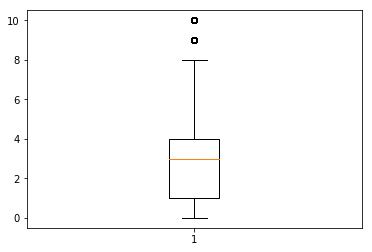

In [614]:
plt.boxplot(df['TotalVisits'])

In [615]:
#outlier removal from column' Page views per visit'

Q1 = df['Page Views Per Visit'].quantile(0.05)
Q3 = df['Page Views Per Visit'].quantile(0.95)
IQR=Q3-Q1

df= df[(df['Page Views Per Visit'] >= Q1) & (df['Page Views Per Visit'] <= Q3)]


{'whiskers': [<matplotlib.lines.Line2D at 0x23d8224aef0>,
 'caps': [<matplotlib.lines.Line2D at 0x23d82254860>,
 'boxes': [<matplotlib.lines.Line2D at 0x23d8224ada0>],
 'medians': [<matplotlib.lines.Line2D at 0x23d82254ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23d82254fd0>],
 'means': []}

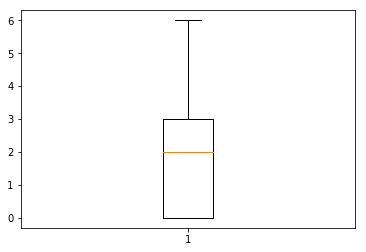

In [616]:
plt.boxplot(df['Page Views Per Visit'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23d8277c7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x23d8277ce80>,
 'boxes': [<matplotlib.lines.Line2D at 0x23d8277c400>],
 'medians': [<matplotlib.lines.Line2D at 0x23d82786550>],
 'fliers': [<matplotlib.lines.Line2D at 0x23d82786898>],
 'means': []}

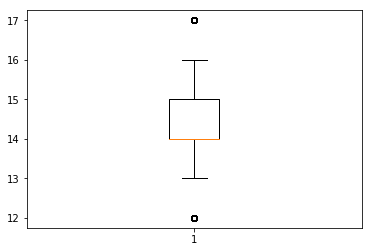

In [617]:
#outlier removal from 'Asymmetric activity score'

Q1 = df['Asymmetrique Activity Score'].quantile(0.05)
Q3 = df['Asymmetrique Activity Score'].quantile(0.95)
IQR=Q3-Q1

df = df[(df['Asymmetrique Activity Score'] >= Q1) & (df['Asymmetrique Activity Score'] <= Q3)]
plt.boxplot(df['Asymmetrique Activity Score'])

In [618]:
imbalance= (sum(df['Converted'])/len(df['Converted'].index))*100
imbalance

38.181595392721476

## Model Building


In [619]:
# Importing train_test_split and seperating column 'converted'  from df database

from sklearn.model_selection import train_test_split

y = df.pop('Converted')
X=df.copy()

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

## Spliting Dataframe 

In [620]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [621]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not sure,Specialization_Operations Management,Specialization_Other,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
4460,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,14.0,15.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0
643,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,14.0,15.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
8025,0,0,9.0,1448,1.8,0,0,0,0,0,0,0,0,14.0,15.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0
3824,0,0,3.0,139,3.0,0,0,0,0,0,0,0,0,13.0,17.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
284,0,0,2.0,1528,1.0,0,0,0,0,0,0,0,0,15.0,15.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0


## Scaling

In [622]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
var1=['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']
X_train[var1]=scaler.fit_transform(X_train[var1])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not sure,Specialization_Operations Management,Specialization_Other,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
8718,0,0,-0.3,-0.6,-0.0,0,0,0,0,0,0,0,0,-1.2,2.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0
6198,1,0,-0.3,-0.4,-0.0,0,0,0,0,0,0,0,0,-0.3,-0.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0
9083,0,0,0.1,-0.8,-0.3,0,0,0,0,0,0,0,0,-0.3,-0.2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
1116,0,0,1.4,2.3,2.4,0,0,0,0,0,0,0,0,0.5,-0.8,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0
6944,0,0,-0.3,2.0,-0.0,0,0,0,0,0,0,0,0,-0.3,-0.8,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0


## RFE

In [623]:
# Importing logistic regression library

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg,15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 

[ True False False  True False False False False False False False False
 False False False False  True False False False False False  True False
 False  True False  True False  True False False False False False False
 False False False False False False False False False False False False
 False False False  True  True False  True  True False  True False False
 False  True False False False False  True False False False False False
  True False False]
[ 1 16 29  1 30 15 60 58 59 27 50 54 61  7 47 56  1 13 43 14 45 33  1 18
 25  1  3  1 48  1 40 39 22 41 42 11 49 32  2 37 34 38 23 26 36 44 51  8
 53 28 52  1  1 12  1  1 21  1 31 55  5  1  4 35 20 10  1 19 24 57  9  6
  1 46 17]


In [624]:
#RFE column selection
col=X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Reference',
       'Last Activity_Email Opened', 'Last Activity_Other',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low'],
      dtype='object')

In [625]:
X_train=X_train[col]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5712 entries, 8718 to 6397
Data columns (total 15 columns):
Do Not Email                                  5712 non-null int64
Total Time Spent on Website                   5712 non-null float64
Lead Origin_Lead Add Form                     5712 non-null uint8
Lead Source_Reference                         5712 non-null uint8
Last Activity_Email Opened                    5712 non-null uint8
Last Activity_Other                           5712 non-null uint8
Last Activity_SMS Sent                        5712 non-null uint8
What is your current occupation_Student       5712 non-null uint8
What is your current occupation_Unemployed    5712 non-null uint8
Tags_Busy                                     5712 non-null uint8
Tags_Closed by Horizzon                       5712 non-null uint8
Tags_Lost to EINS                             5712 non-null uint8
Tags_Will revert after reading the email      5712 non-null uint8
Lead Quality_Worst            

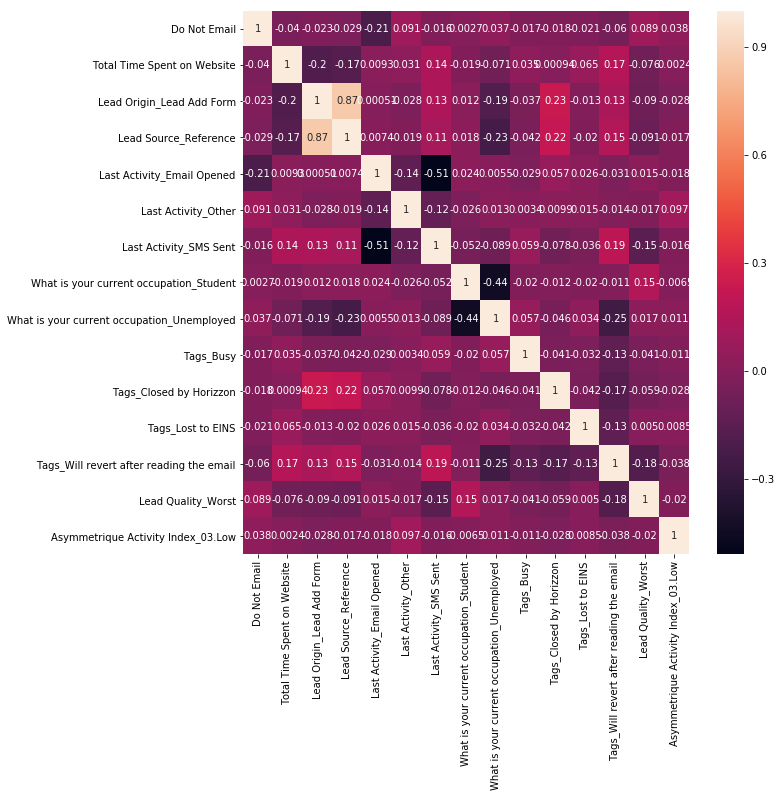

In [626]:
# Creating Heat map

plt.figure(figsize = (10,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [627]:
#Run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
#logsk.fit(X_train[col], y_train)
logsk.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [628]:
#Importing Statsmodel library
import statsmodels.api as sm
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5712
Model:                            GLM   Df Residuals:                     5696
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1827.5
Date:                Mon, 25 Nov 2019   Deviance:                       3655.1
Time:                        08:58:43   Pearson chi2:                 5.65e+03
No. Iterations:                     8   Covariance Type:             nonrobust
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.3585      0.248     -5.476      0.000      -1.845      -0.872
Do Not Email                                  -1.4132      0.212     -6.658      0.000      -1.829      -0.997
Total Time Spent on Website                    0.8804      0.043     20.537      0.000       0.796       0.964
Lead Origin_Lead Add Form                      6.9465      1.044      6.655      0.000       4.901       8.992
Lead Source_Reference                         -4.1502      1.075     -3.862      0.000      -6.256      -2.044
Last Activity_Email Opened                     1.0827      0.117      9.283      0.000       0.854       1.311
Last Activity_Other                            1.0183      0.255      3.996      0.000       0.519       1.518
Last Activity_SMS Sent                         2.3129      0.124     18.710      0.000       2.071       2.555
What is your current occupation_Student       -1.3729      0.416     -3.303      0.001      -2.188      -0.558
What is your current occupation_Unemployed    -2.0854      0.226     -9.226      0.000      -2.528      -1.642
Tags_Busy                                      1.6904      0.199      8.508      0.000       1.301       2.080
Tags_Closed by Horizzon                        2.7125      0.185     14.679      0.000       2.350       3.075
Tags_Lost to EINS                              3.5605      0.215     16.522      0.000       3.138       3.983
Tags_Will revert after reading the email       2.7902      0.098     28.612      0.000       2.599       2.981
Lead Quality_Worst                            -0.9827      0.164     -6.009      0.000      -1.303      -0.662
Asymmetrique Activity Index_03.Low            -1.0535      0.243     -4.333      0.000      -1.530      -0.577
==============================================================================================================
"""

In [629]:
# Checking VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = sm.add_constant(X_train)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,20.8
3,Lead Origin_Lead Add Form,4.2
4,Lead Source_Reference,4.2
7,Last Activity_SMS Sent,1.6
5,Last Activity_Email Opened,1.6
9,What is your current occupation_Unemployed,1.4
8,What is your current occupation_Student,1.3
13,Tags_Will revert after reading the email,1.3
11,Tags_Closed by Horizzon,1.2
2,Total Time Spent on Website,1.1


In [630]:
#Drop variable with high VIF

X_train=X_train.drop('Lead Origin_Lead Add Form',axis=1)

In [631]:
#Model build

logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm4.fit()
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5712
Model:                            GLM   Df Residuals:                     5697
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1952.4
Date:                Mon, 25 Nov 2019   Deviance:                       3904.7
Time:                        08:58:44   Pearson chi2:                 5.80e+03
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.3212      0.242     -5.451      0.000      -1.796      -0.846
Do Not Email                                  -1.1805      0.199     -5.925      0.000      -1.571      -0.790
Total Time Spent on Website                    0.7884      0.041     19.180      0.000       0.708       0.869
Lead Source_Reference                          2.5785      0.267      9.649      0.000       2.055       3.102
Last Activity_Email Opened                     1.1258      0.113      9.970      0.000       0.905       1.347
Last Activity_Other                            0.9675      0.249      3.888      0.000       0.480       1.455
Last Activity_SMS Sent                         2.3708      0.119     19.871      0.000       2.137       2.605
What is your current occupation_Student       -1.3615      0.402     -3.383      0.001      -2.150      -0.573
What is your current occupation_Unemployed    -1.9976      0.222     -9.011      0.000      -2.432      -1.563
Tags_Busy                                      1.5969      0.193      8.278      0.000       1.219       1.975
Tags_Closed by Horizzon                        2.7535      0.175     15.741      0.000       2.411       3.096
Tags_Lost to EINS                              3.4360      0.210     16.370      0.000       3.025       3.847
Tags_Will revert after reading the email       2.6731      0.093     28.710      0.000       2.491       2.856
Lead Quality_Worst                            -0.9346      0.155     -6.028      0.000      -1.239      -0.631
Asymmetrique Activity Index_03.Low            -1.1104      0.238     -4.661      0.000      -1.577      -0.643
==============================================================================================================
"""

In [632]:
# Checking VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = sm.add_constant(X_train)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,20.7
6,Last Activity_SMS Sent,1.6
4,Last Activity_Email Opened,1.6
8,What is your current occupation_Unemployed,1.4
7,What is your current occupation_Student,1.3
12,Tags_Will revert after reading the email,1.3
3,Lead Source_Reference,1.2
2,Total Time Spent on Website,1.1
10,Tags_Closed by Horizzon,1.1
13,Lead Quality_Worst,1.1


In [633]:
#Drop variable with high VIF

X_train=X_train.drop('Last Activity_SMS Sent',axis=1)

In [634]:
#Model build

logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm4.fit()
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5712
Model:                            GLM   Df Residuals:                     5698
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2184.7
Date:                Mon, 25 Nov 2019   Deviance:                       4369.5
Time:                        08:58:44   Pearson chi2:                 6.31e+03
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.1897      0.216      0.876      0.381      -0.234       0.614
Do Not Email                                  -1.4281      0.182     -7.855      0.000      -1.784      -1.072
Total Time Spent on Website                    0.8535      0.039     22.041      0.000       0.778       0.929
Lead Source_Reference                          3.0165      0.268     11.270      0.000       2.492       3.541
Last Activity_Email Opened                    -0.2688      0.081     -3.311      0.001      -0.428      -0.110
Last Activity_Other                           -0.4081      0.235     -1.736      0.082      -0.869       0.053
What is your current occupation_Student       -1.5249      0.371     -4.110      0.000      -2.252      -0.798
What is your current occupation_Unemployed    -1.9916      0.209     -9.549      0.000      -2.400      -1.583
Tags_Busy                                      1.6948      0.180      9.402      0.000       1.342       2.048
Tags_Closed by Horizzon                        2.3115      0.167     13.870      0.000       1.985       2.638
Tags_Lost to EINS                              2.9938      0.196     15.285      0.000       2.610       3.378
Tags_Will revert after reading the email       2.5203      0.085     29.586      0.000       2.353       2.687
Lead Quality_Worst                            -1.1078      0.143     -7.721      0.000      -1.389      -0.827
Asymmetrique Activity Index_03.Low            -0.9624      0.222     -4.343      0.000      -1.397      -0.528
==============================================================================================================
"""

In [635]:
# Checking VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = sm.add_constant(X_train)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,18.3
7,What is your current occupation_Unemployed,1.4
6,What is your current occupation_Student,1.3
11,Tags_Will revert after reading the email,1.3
3,Lead Source_Reference,1.2
9,Tags_Closed by Horizzon,1.1
2,Total Time Spent on Website,1.1
12,Lead Quality_Worst,1.1
1,Do Not Email,1.1
4,Last Activity_Email Opened,1.1


In [636]:
col=X_train.columns
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Reference',
       'Last Activity_Email Opened', 'Last Activity_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low'],
      dtype='object')

In [637]:
#Predicting value of dependent variable

y_train_pred = res.predict(sm.add_constant(X_train))*100
y_train_pred[:10]

8718    9.0
6198    0.9
9083   32.7
1116   90.5
6944   99.3
5694    2.5
2264   33.4
3465   95.2
8849    6.4
2188   58.0
dtype: float64

### This prediction score will give the score in range of 0 to 100. High the score higher the chances of conversion. 

In [638]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([ 9.04125598,  0.89678298, 32.72706273, 90.48704328, 99.30562352,
        2.53357007, 33.35595312, 95.23376508,  6.4117008 , 58.03147431])

In [639]:
# Creating dataframe 
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,9.0,8718
1,0,0.9,6198
2,0,32.7,9083
3,1,90.5,1116
4,1,99.3,6944


In [640]:
# Create columns with different probability cutoffs 
numbers = [x*10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,0,10,20,30,40,50,60,70,80,90
0,0,9.0,8718,1,0,0,0,0,0,0,0,0,0
1,0,0.9,6198,1,0,0,0,0,0,0,0,0,0
2,0,32.7,9083,1,1,1,1,0,0,0,0,0,0
3,1,90.5,1116,1,1,1,1,1,1,1,1,1,1
4,1,99.3,6944,1,1,1,1,1,1,1,1,1,1


In [641]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0,10,20,30,40,50,60,70,80,90]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])*100/total1
    
    speci = cm1[0,0]*100/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]*100/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

    prob  accuracy  sensi  speci
0    0.0      38.3  100.0    0.0
10  10.0      70.2   93.1   55.9
20  20.0      77.5   90.5   69.3
30  30.0      79.9   87.3   75.3
40  40.0      81.2   82.9   80.2
50  50.0      82.1   71.5   88.7
60  60.0      83.2   65.4   94.2
70  70.0      82.5   59.7   96.7
80  80.0      79.9   50.8   98.0
90  90.0      73.4   31.3   99.5


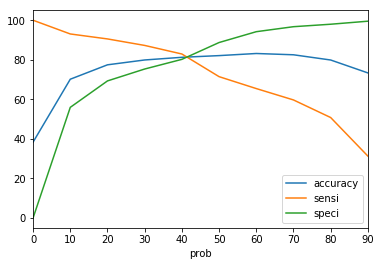

In [642]:
#plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [643]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 43 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,CustID,0,10,20,30,40,50,60,70,80,90,final_predicted
0,0,9.0,8718,1,0,0,0,0,0,0,0,0,0,0
1,0,0.9,6198,1,0,0,0,0,0,0,0,0,0,0
2,0,32.7,9083,1,1,1,1,0,0,0,0,0,0,0
3,1,90.5,1116,1,1,1,1,1,1,1,1,1,1,1
4,1,99.3,6944,1,1,1,1,1,1,1,1,1,1,1


In [644]:
# Check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)*100

81.4250700280112

## Confusion Matrix

In [645]:
#Creating Confusion Matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2908,  614],
       [ 447, 1743]], dtype=int64)

In [646]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [647]:
# Sensitivity of our logistic regression model
TP*100 / float(TP+FN)

79.58904109589041

In [648]:
#Calculate specificity
TN*100 / float(TN+FP)

82.56672345258376

In [649]:
# Calculate Recall
print (TN*100 / float(TN+ FN))

86.67660208643815


In [650]:
# Calculate Precision(Conversion Rate)
Conversion_rate= TP*100/ float(TP+FP)
Conversion_rate

73.94993635977939

### As we can see precision(conversion_rate) is less than 80%  and we need more than 80% so optimal conversion score 43 is not a good idea here. so i take 70 as conversion score.

In [651]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 70 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,0,10,20,30,40,50,60,70,80,90,final_predicted,predicted
0,0,9.0,8718,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.9,6198,1,0,0,0,0,0,0,0,0,0,0,0
2,0,32.7,9083,1,1,1,1,0,0,0,0,0,0,0,0
3,1,90.5,1116,1,1,1,1,1,1,1,1,1,1,1,1
4,1,99.3,6944,1,1,1,1,1,1,1,1,1,1,1,1


In [652]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3407  115]
 [ 883 1307]]


In [653]:
# Check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)*100)

82.52801120448179


In [654]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [655]:
# Sensitivity/Recall of our logistic regression model
TP*100 / float(TP+FN)

59.68036529680365

In [656]:
# Calculate specificity
TN*100 / float(TN+FP)

96.73480976717774

In [657]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP*100/ float(TN+FP))

3.26519023282226


In [658]:
# Precision(Conversion Score)
print (TP*100 / float(TP+FP))

91.91279887482419


## As we can see precision(Conversion Score) is more than 80 this time so taking 70 as conversion score is a good idea.

In [659]:
X_train.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Other,What is your current occupation_Student,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Will revert after reading the email,Lead Quality_Worst,Asymmetrique Activity Index_03.Low
8718,0,-0.6,0,0,0,0,1,0,0,0,0,0,0
6198,1,-0.4,0,0,0,0,1,0,0,0,0,1,0
9083,0,-0.8,0,1,0,0,0,0,0,0,0,0,0
1116,0,2.3,0,0,1,0,1,0,0,0,1,0,0
6944,0,2.0,1,1,0,0,1,0,1,0,0,0,0


## ROC Curve

In [660]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [661]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

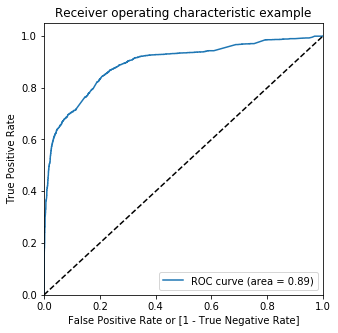

In [662]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### ROC curve area is .89

In [663]:
from sklearn.metrics import precision_recall_curve

In [664]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       0
 6       1
 7       1
 8       0
 9       1
 10      1
 11      1
 12      0
 13      0
 14      0
 15      1
 16      1
 17      0
 18      0
 19      0
 20      1
 21      1
 22      1
 23      0
 24      0
 25      0
 26      0
 27      1
 28      0
 29      0
        ..
 5682    0
 5683    0
 5684    1
 5685    0
 5686    1
 5687    1
 5688    0
 5689    1
 5690    0
 5691    0
 5692    0
 5693    1
 5694    1
 5695    0
 5696    1
 5697    0
 5698    1
 5699    1
 5700    0
 5701    0
 5702    1
 5703    0
 5704    1
 5705    1
 5706    0
 5707    1
 5708    1
 5709    0
 5710    1
 5711    0
 Name: Converted, Length: 5712, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
 5       0
 6       0
 7       1
 8       0
 9       0
 10      1
 11      1
 12      0
 13      0
 14      0
 15      1
 16      0
 17      0
 18      0
 19      0
 20      0
 21      0
 22      0
 23      0
 24      0
 25      

## Precision- Recall Curve

In [665]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

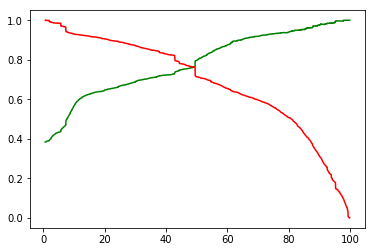

In [666]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Applying model on Test Dataset

In [667]:
#Scaling and transforming
var1=['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']
X_test[var1]=scaler.fit_transform(X_test[var1])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not sure,Specialization_Operations Management,Specialization_Other,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
4460,0,0,-1.2,-0.9,-1.2,0,0,0,0,0,0,0,0,-0.4,-0.8,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0
643,0,0,-1.2,-0.9,-1.2,0,0,0,0,0,0,0,0,-0.4,-0.8,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
8025,0,0,2.7,1.8,-0.2,0,0,0,0,0,0,0,0,-0.4,-0.8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0
3824,0,0,0.1,-0.6,0.6,0,0,0,0,0,0,0,0,-1.2,0.3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
284,0,0,-0.3,2.0,-0.6,0,0,0,0,0,0,0,0,0.5,-0.8,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0


In [668]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Other,What is your current occupation_Student,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Will revert after reading the email,Lead Quality_Worst,Asymmetrique Activity Index_03.Low
4460,0,-0.9,0,1,0,0,1,1,0,0,0,0,0
643,0,-0.9,0,0,0,0,1,0,0,1,0,0,0
8025,0,1.8,0,1,0,0,1,0,0,0,0,0,0
3824,0,-0.6,0,1,0,0,1,0,0,0,1,0,0
284,0,2.0,0,0,0,0,1,0,0,0,1,0,0


In [669]:
X_test.shape

(2449, 13)

In [670]:
X_test_sm = sm.add_constant(X_test)

In [671]:
y_test_pred = res.predict(X_test_sm)*100

In [672]:
y_test_pred[:10]

4460   24.8
643    61.3
8025   37.4
3824   48.4
284    91.7
3170    7.3
7971    2.8
3606    7.3
6427   50.3
3518   62.2
dtype: float64

In [673]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [674]:
y_pred_1.head()

,0
4460,24.8
643,61.3
8025,37.4
3824,48.4
284,91.7


In [675]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [676]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [677]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [678]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [679]:
y_pred_final.head()

,Converted,CustID,0
0,0,4460,24.8
1,1,643,61.3
2,1,8025,37.4
3,1,3824,48.4
4,0,284,91.7


In [680]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Score'})

In [681]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Converted','Converted_Score'], axis=1)

In [682]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Converted,Converted_Score
0,4460,0,24.8
1,643,1,61.3
2,8025,1,37.4
3,3824,1,48.4
4,284,0,91.7


In [683]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Score.map(lambda x: 1 if x > 70 else 0)

In [684]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)*100

82.8501429154757

In [685]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1473,   50],
       [ 370,  556]], dtype=int64)

In [686]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [687]:
#Calculate specificity
TN*100 / float(TN+FP)

96.71700590938936

In [688]:
# Precision(Conversion_rate)
TP*100 / float(TP+FP)

91.74917491749174

### ->Precision(Conversion Rate) of  test dataset is 91